I'll first run the code as a simulation with the backend qasm_simulator

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer, IBMQ

#we first work with a local simulation
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

#Creating quantum anc classical registers
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
#Creating the circuit
qc_straight = QuantumCircuit(qr,cr)
qc_straight.measure(qr,cr)
#Drawing the circuit
qc_straight.draw()

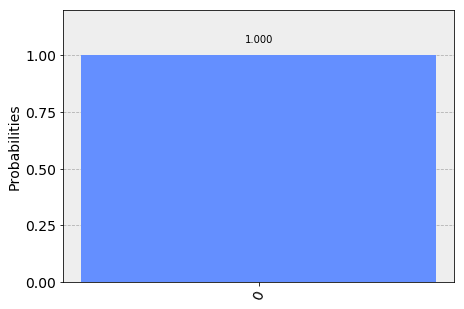

In [2]:
#performing the actual measurement and getting the results
job = execute(qc_straight, backend,shots=shots)
result = job.result()
plot_histogram(result.get_counts(qc_straight))

In [3]:
#now we flip the bit by applying a Pauli operator
qc_flipped = QuantumCircuit(qr, cr)
qc_flipped.x(qr)
qc_flipped.measure(qr,cr)
qc_flipped.draw()

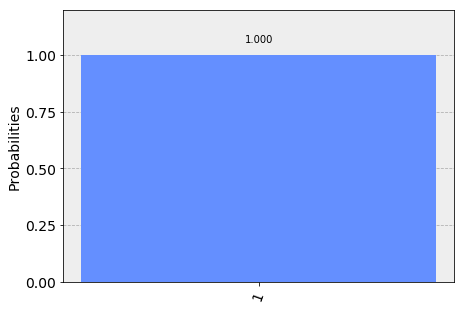

In [4]:
job = execute(qc_flipped, backend,shots=shots)
result = job.result()
plot_histogram(result.get_counts(qc_flipped))

Now I'll run the same code on a real quantum computer

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer, IBMQ
from qiskit.providers.ibmq import least_busy
#we now work with a real quantum computer
import Qconfig_IBMQ_experience
import Qconfig_IBMQ_network


#IBMQ.disable_accounts(token=Qconfig_IBMQ_experience.APItoken)
IBMQ.enable_account(Qconfig_IBMQ_experience.APItoken)
shots = 1024

In [6]:
#Let's see which backends are available
IBMQ.backends()
#Whicha are operational and are not simulators
operational_devices = IBMQ.backends(operational=True, simulator=False)
operational_devices
#choose the backend that is least busy
backend = least_busy(operational_devices)
backend

<IBMQBackend('ibmq_16_melbourne') from IBMQ()>

In [7]:
#Creating quantum anc classical registers
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
#Creating the circuit
qc_straight = QuantumCircuit(qr,cr)
qc_straight.measure(qr,cr)
#Drawing the circuit
qc_straight.draw()

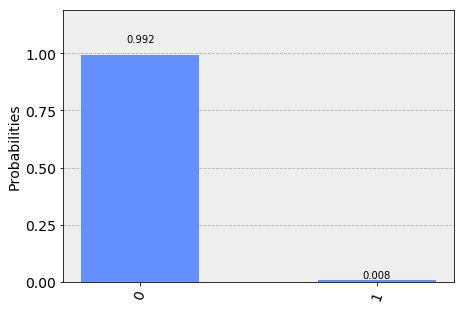

In [8]:
#run the job on this backend
job = execute(qc_straight, backend,shots=shots)
result = job.result()
plot_histogram(result.get_counts(qc_straight))

In [9]:
#now we flip the bit by applying a Pauli operator
qc_flipped = QuantumCircuit(qr, cr)
qc_flipped.x(qr)
qc_flipped.measure(qr,cr)
qc_flipped.draw()

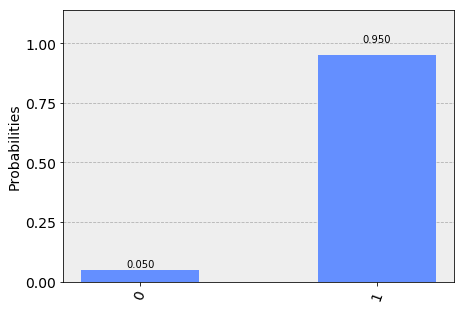

In [10]:
job = execute(qc_flipped, backend,shots=shots)
result = job.result()
plot_histogram(result.get_counts(qc_flipped))